In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import rasterio
%matplotlib inline

path = os.getcwd()
rootpath = 'c:\\Users\\Gamelab\\Desktop\\RT\\Resilience_Lab\\MRA_COMPILED_2\\'

path

'C:\\Users\\Gamelab\\Desktop\\RT\\Resilience_Lab'

# 1996 and 2010

In [7]:
import rasterio as rio
orgpath = path+'\\MRA_COMPILED_2\\rasters_100mts\\ams_metronamica_100\\landusegrouped_2010_nodatafilled.tif'

with rio.open(orgpath) as dem_src:
    lu2010 = dem_src.read(1)

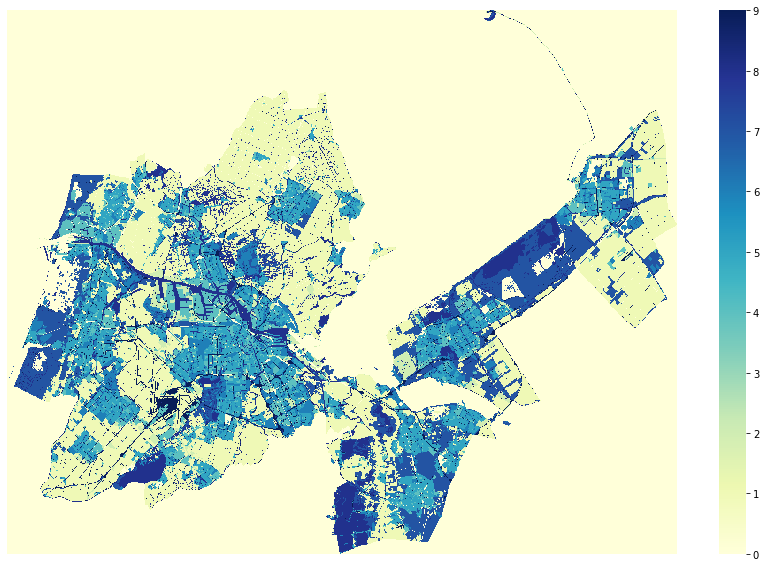

In [17]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(lu2010, cmap="YlGnBu")
ax.set_axis_off()

(array([2.71587e+05, 7.00530e+04, 4.94900e+03, 2.90000e+01, 1.27770e+04,
        2.31650e+04, 1.32460e+04, 2.39200e+04, 1.63190e+04, 6.80000e+03]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

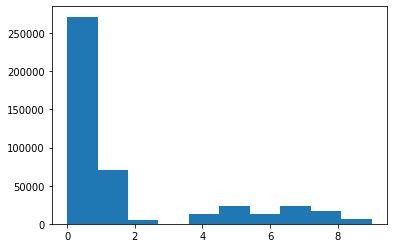

In [29]:
import numpy as np
a= np.array(lu2010.reshape(-1,1))
plt.hist(a)

In [25]:
orgpath = path+'\\MRA_COMPILED_2\\rasters_100mts\\ams_metronamica_100\\landuse_grouped_100_nodatafilled.tif'

with rio.open(orgpath) as dem_src:
    lu2010 = dem_src.read(1)

442845

# 1996 and 2006

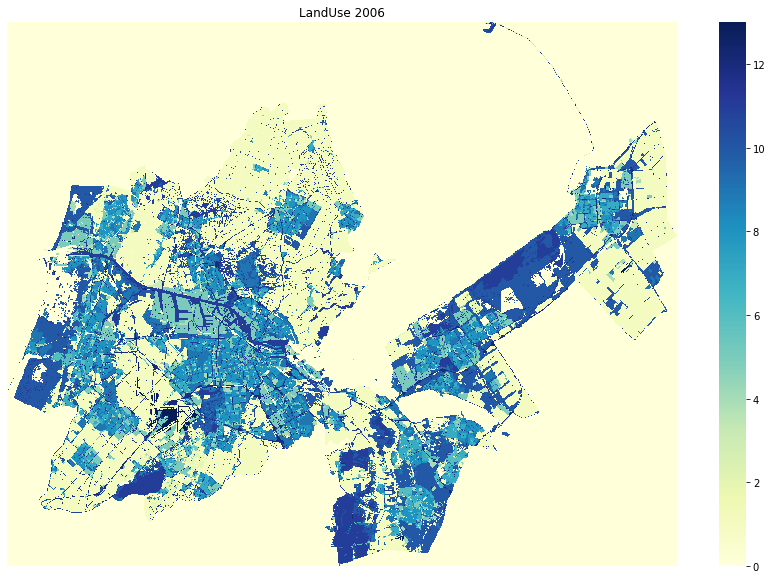

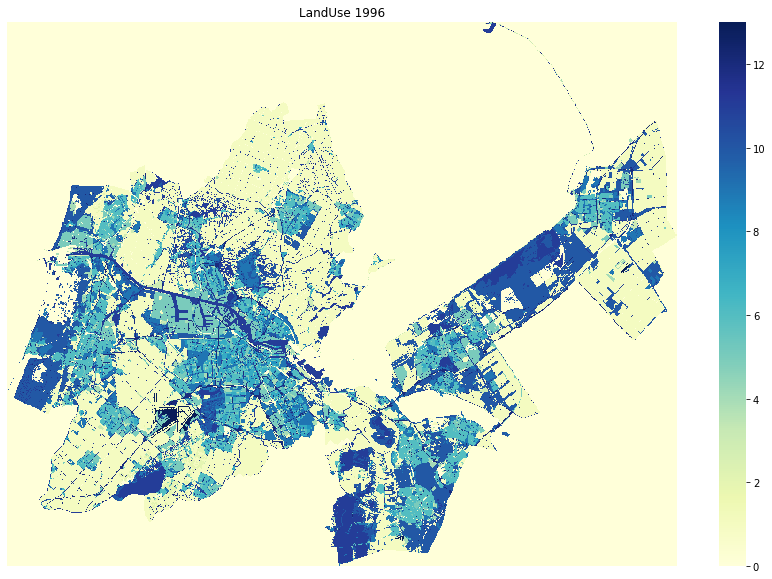

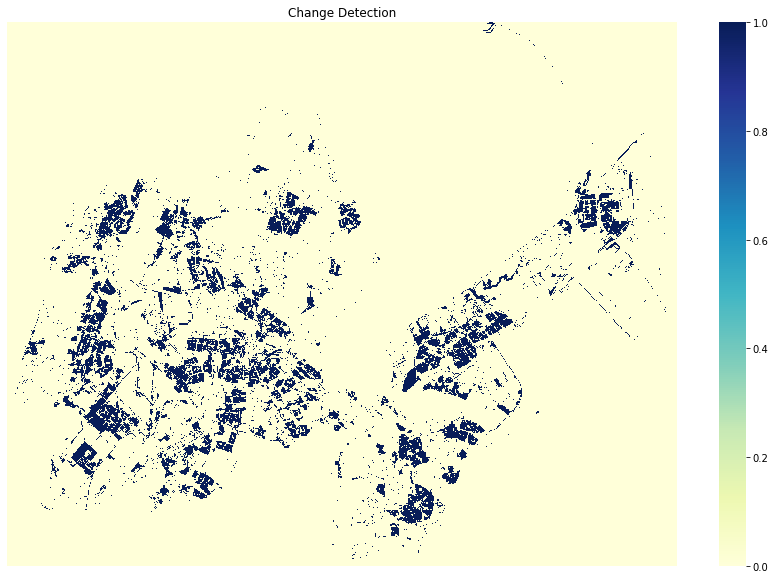

In [26]:
import rasterio as rio
path1996 = rootpath+'rasters_100mts\\ams_metronamica_100\\mra1996_landuse_rasterized_july.tif'
path2006 = rootpath+'rasters_100mts\\ams_metronamica_100\\landuse2006_regrouped_rasterized_july.tif'

## opening 2010 file
with rio.open(path2006) as dem_src:
    lu2006 = dem_src.read(1)

## opening 1996 file
with rio.open(path1996) as dem_src:
    lu1996 = dem_src.read(1)

    
#view
import seaborn as sns
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(lu2006, cmap="YlGnBu")
ax.set_title('LandUse 2006')
ax.set_axis_off()

fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(lu1996, cmap="YlGnBu")
ax.set_title('LandUse 1996')
ax.set_axis_off()

#plot changes
## plotting changes
## for every cell in 2006, compare with adjacent cell in 1996. if they are the same, the corresponding cell in the change detection array = 0. if there is change, then 1. in the change part, have a dictionary where you note down 1996 landuse class as key and as the value, hold the changed value in 2010. 
change_detection_array = np.zeros((585, 757))

change_dict = {}

for i in range(lu2006.shape[0]):
    for j in range(lu2006.shape[1]):
        if lu2006[i][j] == lu1996[i][j]:
            change_detection_array[i][j]=0
        else:
            change_detection_array[i][j]=1


#visualize changes
import seaborn as sns
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(change_detection_array, cmap="YlGnBu")
ax.set_title('Change Detection')
ax.set_axis_off()

In [31]:
(unique,counts) = np.unique(lu1996,return_counts= True)
frequencies1996 = np.asarray((unique,counts)).T


(unique1,counts1) = np.unique(lu2006,return_counts= True)
frequencies2006 = np.asarray((unique1,counts1)).T

print(frequencies1996), print(frequencies2006)

op = pd.DataFrame()
categs = []
val1996=[]
val2006=[]
for i in range(len(frequencies1996)):
    categs.append(int(frequencies1996[i][0]))
    val1996.append(int(frequencies1996[i][1]))
    
for i in range(len(frequencies2006)):
    val2006.append(int(frequencies2006[i][1]))
#val2006.append(0)

diffs = []
for i in range(len(val1996)):
    diffs.append(val2006[i]-val1996[i])
op['categories'] = categs
op['1996']=val1996
op['2006']=val2006
op['difference'] = diffs

category_map = {0.0:'outside_area',1.0: 'agriculture',2.0: 'greenhouses',3.0:'industry/mineral',4.0:'public_amenities',5.0:'commercial',6.0:'residential_low',7.0:'residential_medium',8.0:'residential_high',9.0:'recreation',10.0:'nature',11.0:'water',12.0:'transport',13.0:'airport'}


op['categories']=op['categories'].astype('float')
op['categories']=op['categories'].map(category_map)

op




[[0.00000e+00 2.71733e+05]
 [1.00000e+00 7.57710e+04]
 [2.00000e+00 1.08000e+03]
 [3.00000e+00 9.76000e+02]
 [4.00000e+00 3.06400e+03]
 [5.00000e+00 1.21950e+04]
 [6.00000e+00 1.58010e+04]
 [7.00000e+00 4.20500e+03]
 [8.00000e+00 5.58000e+02]
 [9.00000e+00 1.21320e+04]
 [1.00000e+01 2.34530e+04]
 [1.10000e+01 1.55690e+04]
 [1.20000e+01 5.70600e+03]
 [1.30000e+01 6.02000e+02]]
[[0.00000e+00 2.71602e+05]
 [1.00000e+00 7.04830e+04]
 [2.00000e+00 1.12400e+03]
 [3.00000e+00 6.61000e+02]
 [4.00000e+00 3.15800e+03]
 [5.00000e+00 1.36780e+04]
 [6.00000e+00 1.22300e+03]
 [7.00000e+00 7.19300e+03]
 [8.00000e+00 1.41180e+04]
 [9.00000e+00 1.30350e+04]
 [1.00000e+01 2.37990e+04]
 [1.10000e+01 1.61320e+04]
 [1.20000e+01 5.94500e+03]
 [1.30000e+01 6.94000e+02]]


,categories,1996,2006,difference
0,outside_area,271733,271602,-131
1,agriculture,75771,70483,-5288
2,greenhouses,1080,1124,44
3,industry/mineral,976,661,-315
4,public_amenities,3064,3158,94
5,commercial,12195,13678,1483
6,residential_low,15801,1223,-14578
7,residential_medium,4205,7193,2988
8,residential_high,558,14118,13560
9,recreation,12132,13035,903


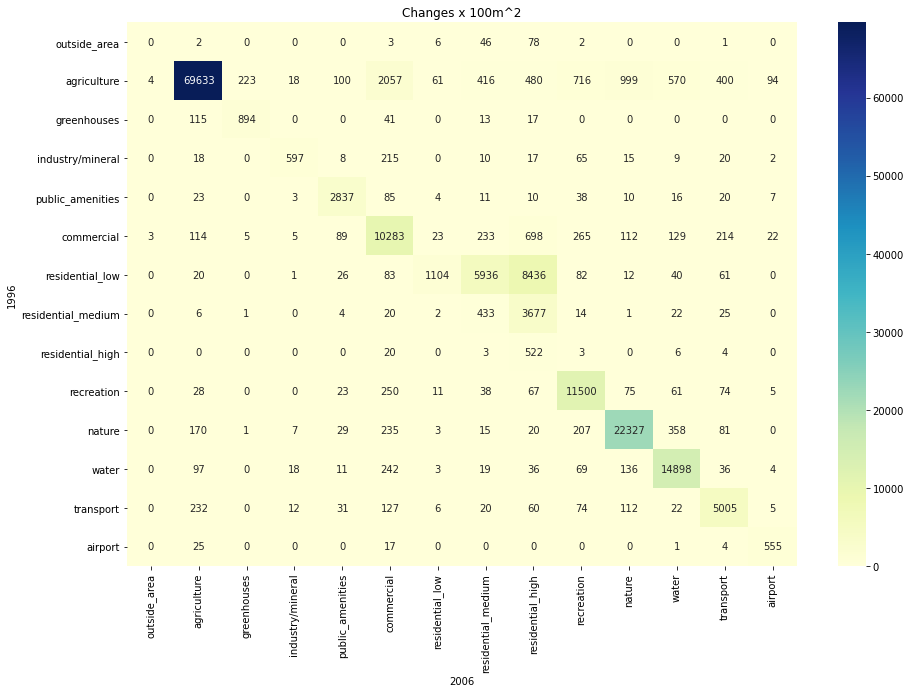

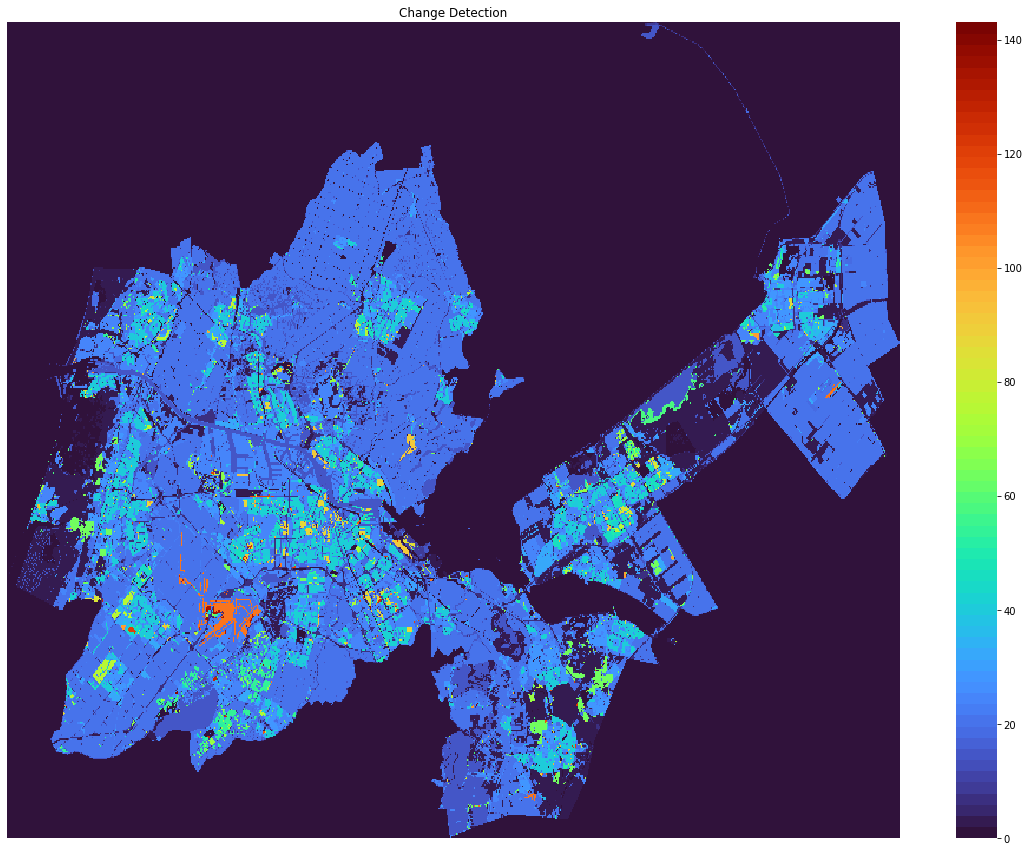

In [32]:
# change detection

for i in range(change_detection_array.shape[0]):
    for j in range(change_detection_array.shape[1]):
        change_dict[(i,j)]=(lu1996[i][j],lu2006[i][j])
        

changes=[]
change_count={}
for i in list(change_dict.values()):
    if i not in changes:
        changes.append(i)
        change_count[(i[0],i[1])]=1
    else:
        change_count[(i[0],i[1])]+=1

#change_count


category_map = {0.0:'outside_area',1.0: 'agriculture',2.0: 'greenhouses',3.0:'industry/mineral',4.0:'public_amenities',5.0:'commercial',6.0:'residential_low',7.0:'residential_medium',8.0:'residential_high',9.0:'recreation',10.0:'nature',11.0:'water',12.0:'transport',13.0:'airport'}
categs_names = {}
for i in range(len(changes)):
    categs_names[str(changes[i])] = category_map[changes[i][0]] + ' to ' +  category_map[changes[i][1]]

#print(categs_names)

#now combine categs names with change_count 
categ_names_counts = {}
for change in list(change_count.keys()):
    categ_names_counts[categs_names[str(change)]] = change_count[change]
    
#categ_names_counts

changes=[]
change_count={}
for i in list(change_dict.values()):
    if i not in changes:
        changes.append(i)
        change_count[(i[0],i[1])]=1
    else:
        change_count[(i[0],i[1])]+=1

#change_count.keys()

change_heatmap = np.zeros((14,14))
for i in range(14):
    for j in range(14):
        try:
            change_heatmap[i][j] = int(change_count[(float(i),float(j))])
        except:
            change_heatmap[i][j] = 0 
change_heatmap[0][0] = 0

#change_heatmap
fig,ax = plt.subplots(figsize=(15,10))
x_axis_labels = np.array(list(category_map.values())) # labels for x-axis
y_axis_labels = np.array(list(category_map.values())) # labels for y-axis

ax = sns.heatmap(change_heatmap, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap="YlGnBu", annot=True,fmt='g')
ax.set_title('Changes x 100m^2')
plt.xlabel('2006')
plt.ylabel('1996')
#ax.set_axis_off()


change_dict_with_categname = {}
for i in list(change_dict.keys()):
    #replace the change category with the name from categ_names
    change_dict_with_categname[str(i)] = categs_names[str(change_dict[i])]
    
    
array_list = list(categs_names.keys())
a={}
b={}
for i in range(len(array_list)):
    a[array_list[i]]=i
    b[i] = categs_names[array_list[i]]

#change_dict_with_categname

spatial_changedict = np.zeros((585,757))

for i in range(585):
    for j in range(757):
        spatial_changedict[i][j] = a[str(change_dict[(i,j)])]

#spatial_changedict

import seaborn as sns
import matplotlib as mpl
fig,ax = plt.subplots(figsize=(20,15))
ncols = 73
cmap = mpl.colors.ListedColormap(plt.cm.turbo(np.linspace(0, 1, ncols)))
#cmap.set_under((.8, .8, .8, 1.0))

ax = sns.heatmap(spatial_changedict, cmap=cmap)
ax.set_title('Change Detection')
ax.set_axis_off()



In [55]:
## conversion to raster

## converting array to raster 
from osgeo import gdal
from osgeo import gdal_array
from osgeo import osr

def array2raster(newRasterfn, dataset, array, dtype):
    """
    save GTiff file from numpy.array
    input:
        newRasterfn: save file name
        dataset : original tif file (lu1996)
        array : numpy.array  (spatial_changedict)
        dtype: Byte or Float32.
    """
    cols = array.shape[1]
    rows = array.shape[0]
    originX, pixelWidth, b, originY, d, pixelHeight = dataset.GetGeoTransform() 

    driver = gdal.GetDriverByName('GTiff')

    # set data type to save.
    GDT_dtype = gdal.GDT_Unknown
    if dtype == "Byte": 
        GDT_dtype = gdal.GDT_Byte
    elif dtype == "Float32":
        GDT_dtype = gdal.GDT_Float32
    else:
        print("Not supported data type.")

    # set number of band.
    if array.ndim == 2:
        band_num = 1
    else:
        band_num = array.shape[2]

    outRaster = driver.Create(newRasterfn, cols, rows, band_num, GDT_dtype)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))

    # Loop over all bands.
    for b in range(band_num):
        outband = outRaster.GetRasterBand(b + 1)
        # Read in the band's data into the third dimension of our array
        if band_num == 1:
            outband.WriteArray(array)
        else:
            outband.WriteArray(array[:,:,b])

    # setteing srs from input tif file.
    prj=dataset.GetProjection()
    outRasterSRS = osr.SpatialReference(wkt=prj)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache() 
    
    

dataset = gdal.Open(path1996)
op = array2raster(rootpath+'spatialchange2.tif',dataset,spatial_changedict,'Float32')

In [60]:
b

{0: 'outside_area to outside_area',
 1: 'recreation to industry/mineral',
 2: 'greenhouses to transport',
 3: 'residential_medium to nature',
 4: 'greenhouses to nature',
 5: 'recreation to nature',
 6: 'greenhouses to industry/mineral',
 7: 'recreation to transport',
 8: 'residential_high to commercial',
 9: 'public_amenities to transport',
 10: 'residential_high to transport',
 11: 'residential_high to industry/mineral',
 12: 'public_amenities to industry/mineral',
 13: 'public_amenities to water',
 14: 'residential_high to water',
 15: 'residential_high to nature',
 16: 'greenhouses to water',
 17: 'agriculture to industry/mineral',
 18: 'public_amenities to public_amenities',
 19: 'greenhouses to public_amenities',
 20: 'agriculture to agriculture',
 21: 'recreation to agriculture',
 22: 'agriculture to transport',
 23: 'agriculture to water',
 24: 'public_amenities to commercial',
 25: 'residential_low to recreation',
 26: 'residential_high to agriculture',
 27: 'commercial to res